<a href="https://colab.research.google.com/github/kartikgill/TF2-Keras-GAN-Notebooks/blob/main/dcgan/DC-GAN-Celeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Useful Libraries

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [ ]:
import tensorflow
print (tensorflow.__version__)

2.3.0


# Download and Unzip dataset

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
!unzip /content/gdrive/MyDrive/GAN_datasets/celeb_faces.zip -d /content/

In [ ]:
import glob
files = glob.glob('/content/100k/100k/*.jpg')
len(files)

100000

In [ ]:
for file in files[:10]:
    anime_img = cv2.imread(file)
    print (anime_img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


# Display samples

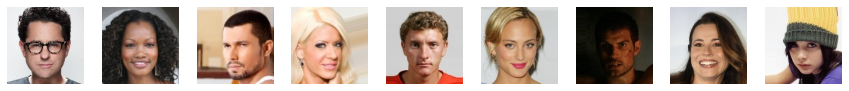

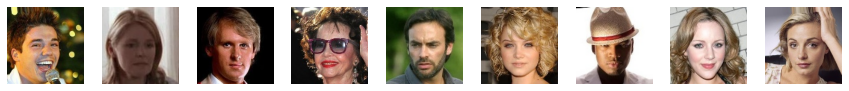

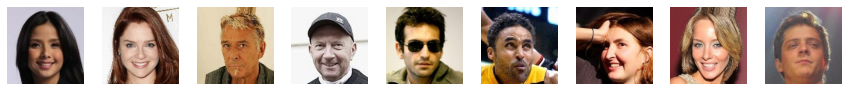

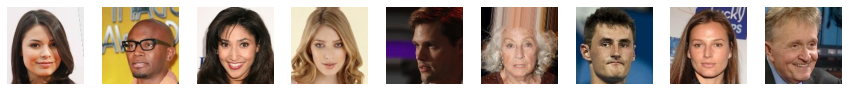

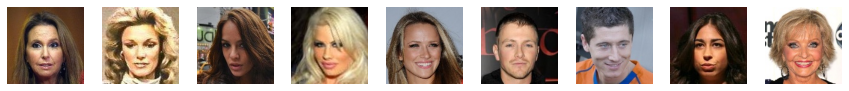

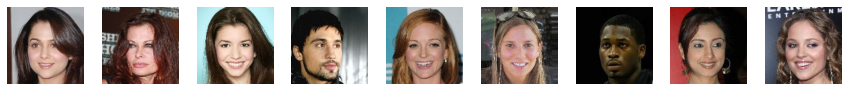

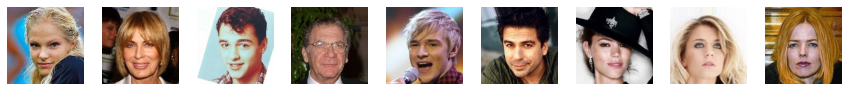

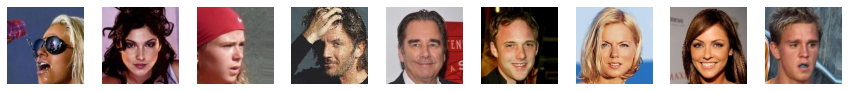

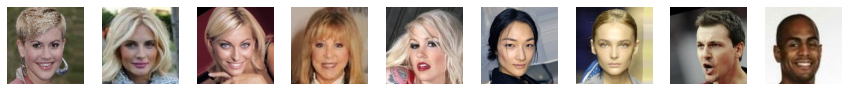

In [ ]:
for k in range(9):
    plt.figure(figsize=(15, 15))
    for j in range(9):
        f = np.random.choice(files)
        celeb_img = cv2.imread(f)
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        plt.subplot(990 + 1 + j)
        plt.imshow(celeb_img)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

# Data Preparation and Normalization

In [ ]:
from tqdm import tqdm_notebook

images = []
for file in tqdm_notebook(files):
    celeb_img = cv2.imread(file)
    celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
    celeb_img = cv2.resize(celeb_img, (100, 100))
    images.append((celeb_img-127.5)/127.5)

images = np.array(images)
print (images.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


# Define Generator Model

In [ ]:
random_input = tensorflow.keras.layers.Input(shape = 100)

x = tensorflow.keras.layers.Dense(64 * 7 * 7)(random_input)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Reshape((7, 7, 64))(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2D(filters=3, kernel_size=(3,3), padding='same')(x)
generated_image = tensorflow.keras.layers.Activation('tanh')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 3136)              316736    
_________________________________________________________________
activation (Activation)      (None, 3136)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3136)              12544     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       204928    
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 128)      

# Define Discriminator

In [ ]:
image_input = tensorflow.keras.layers.Input(shape=(56, 56, 3))

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=2, padding='same')(image_input)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2, padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=2, padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Flatten()(x)

x = tensorflow.keras.layers.Dense(1)(x)
real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 56, 56, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       9728      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [ ]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Define combined model: DCGAN

In [ ]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

dcgan_model = tensorflow.keras.models.Model(random_input, d_output)
dcgan_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
functional_1 (Functional)    (None, 56, 56, 3)         1768387   
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 904961    
Total params: 2,673,348
Trainable params: 1,761,347
Non-trainable params: 912,001
_________________________________________________________________


# Compiling Models

In [ ]:
dcgan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [ ]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_files = np.random.choice(files, size=batch_size)
    images = []
    for file in random_files:
        celeb_img = cv2.imread(file)
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        celeb_img = cv2.resize(celeb_img, (56, 56))
        images.append((celeb_img-127.5)/127.5)
    real_images = np.array(images)
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(11, 11))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        fake_samples = (fake_samples+1.0)/2.0
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j])
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training DCGAN on Celeb Faces

In [ ]:
epochs = 200
batch_size = 100
steps = 500
noise_size = 100

for i in range(0, epochs):
    if (i%5 == 0):
        show_generator_results(generator_network)
        generator_network.save('/content/gdrive/MyDrive/GAN_datasets/celeb_model_'+ str(i))
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = dcgan_model.train_on_batch(gan_input, gan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

# Show Results

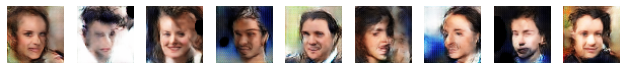

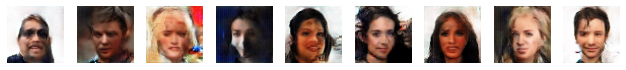

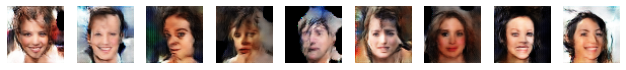

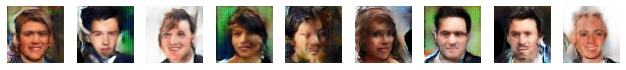

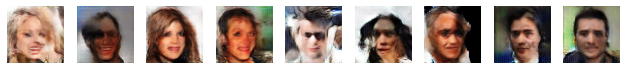

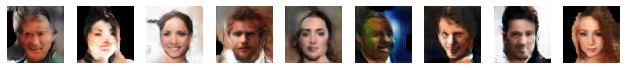

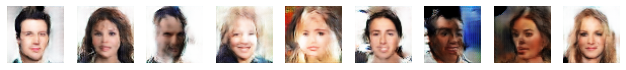

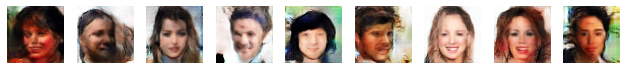

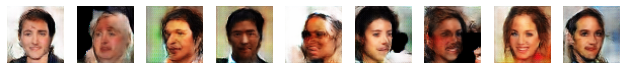

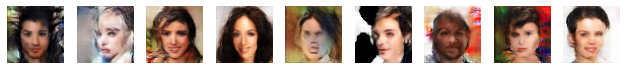

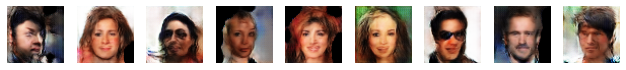

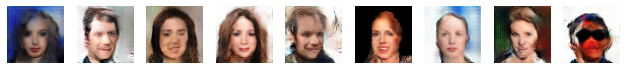

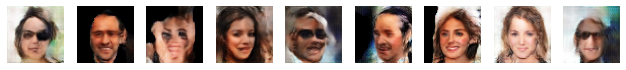

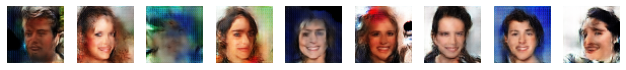

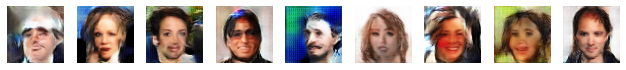

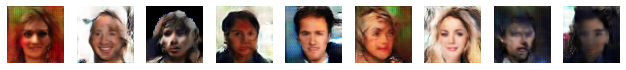

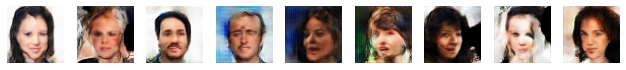

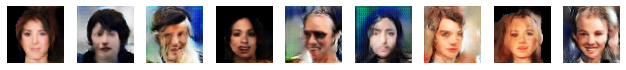

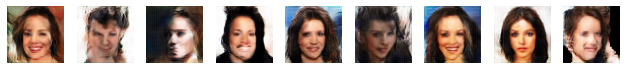

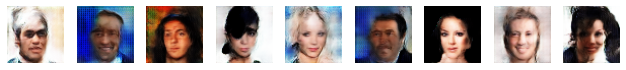

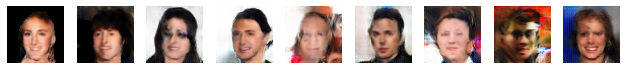

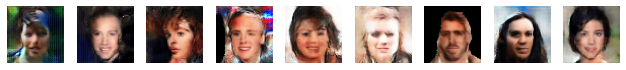

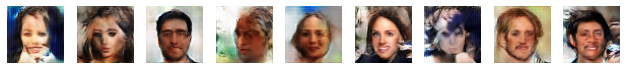

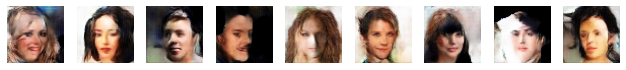

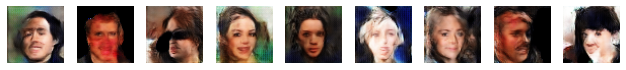

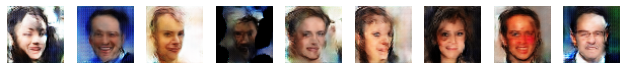

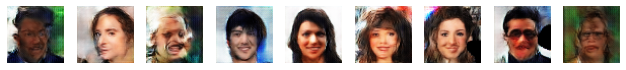

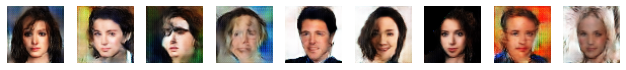

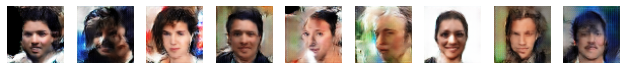

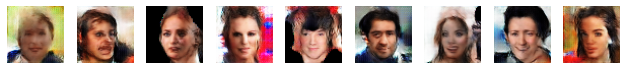

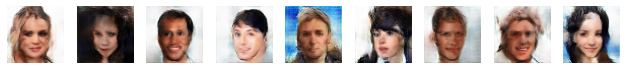

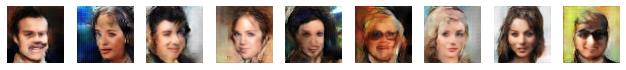

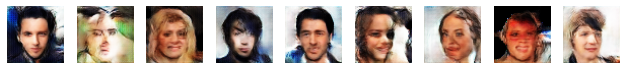

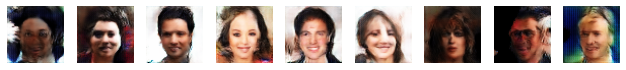

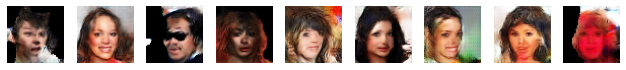

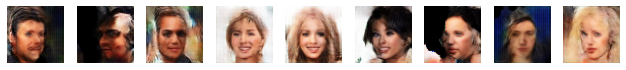

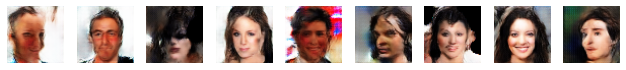

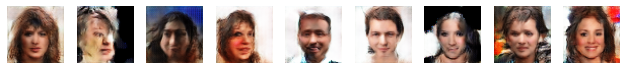

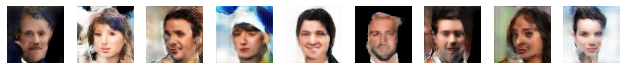

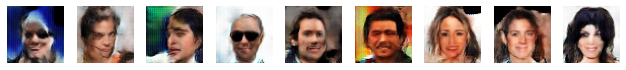

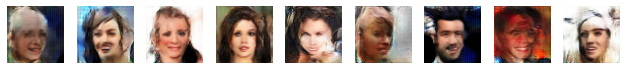

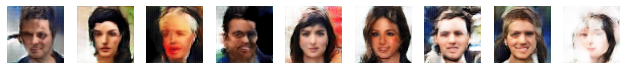

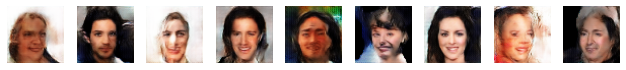

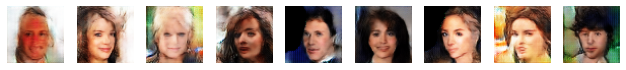

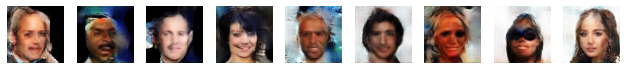

In [ ]:
#Generating Unlimited samples
noise_size=100
generator_network = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/GAN_datasets/celeb_model_new')
for i in range(5):
    show_generator_results(generator_network)